In [2]:
import pandas as pd

df = pd.read_csv("../data/raw_analyst_ratings.csv")
df.head()


,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [3]:
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1407328 non-null  int64 
 1   headline    1407328 non-null  object
 2   url         1407328 non-null  object
 3   publisher   1407328 non-null  object
 4   date        1407328 non-null  object
 5   stock       1407328 non-null  object
dtypes: int64(1), object(5)
memory usage: 64.4+ MB


,Unnamed: 0,headline,url,publisher,date,stock
count,1.407328e+06,1407328,1407328,1407328,1407328,1407328
unique,NaN,845770,883429,1034,39957,6204
top,NaN,Benzinga's Top Upgrades,https://www.benzinga.com/news/20/03/15538835/s...,Paul Quintaro,2020-03-12 00:00:00,MRK
freq,NaN,5449,1704,228373,1766,3333
mean,7.072454e+05,NaN,NaN,NaN,NaN,NaN
std,4.081009e+05,NaN,NaN,NaN,NaN,NaN
min,0.000000e+00,NaN,NaN,NaN,NaN,NaN
25%,3.538128e+05,NaN,NaN,NaN,NaN,NaN
50%,7.072395e+05,NaN,NaN,NaN,NaN,NaN
75%,1.060710e+06,NaN,NaN,NaN,NaN,NaN


In [4]:
df['publisher'].value_counts().head(10)


publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64

<Axes: ylabel='publisher'>

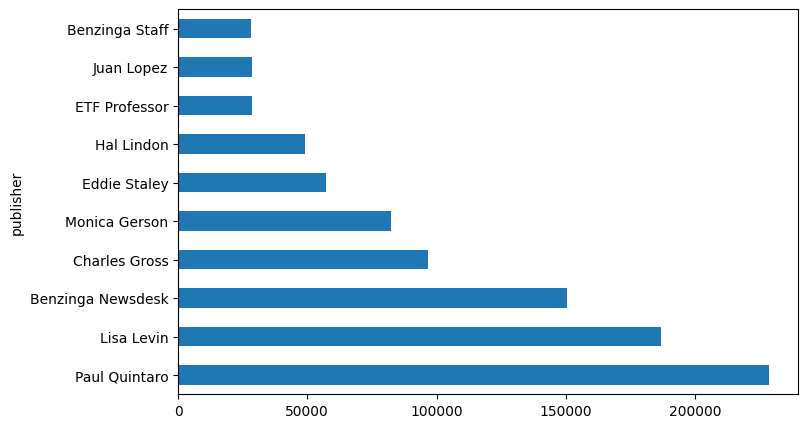

In [5]:
# Top 10 publishers
df['publisher'].value_counts().head(10).plot(kind='barh', figsize=(8,5))


<Axes: xlabel='date_only'>

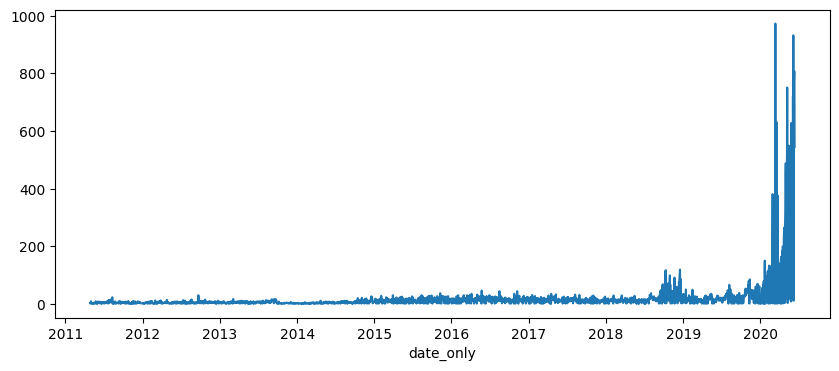

In [6]:
df['date'] = pd.to_datetime(df['date'], errors='coerce', utc=True)
df[df['date'].isna()].head()
df['date_only'] = df['date'].dt.date
df.groupby('date_only').size().plot(kind='line', figsize=(10,4))


In [7]:
df['headline_len'] = df['headline'].str.len()
df['headline_len'].describe()

count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_len, dtype: float64

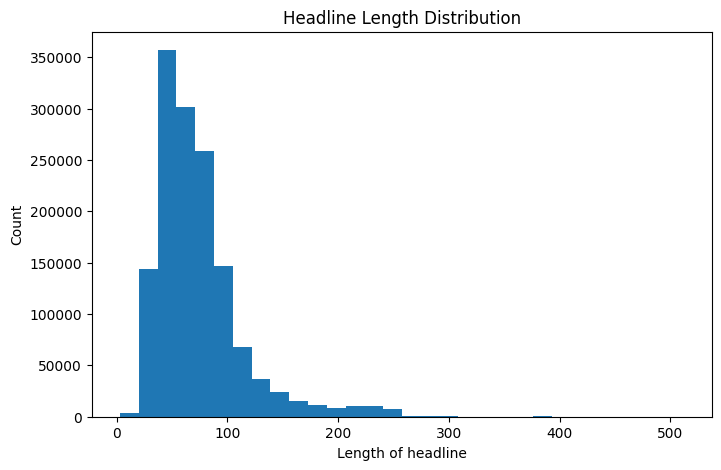

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.hist(df['headline_len'], bins=30)
plt.title("Headline Length Distribution")
plt.xlabel("Length of headline")
plt.ylabel("Count")
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_5604\2161487732.py:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['month'] = df['date'].dt.to_period('M')


<Axes: title={'center': 'Articles per Month'}, xlabel='month'>

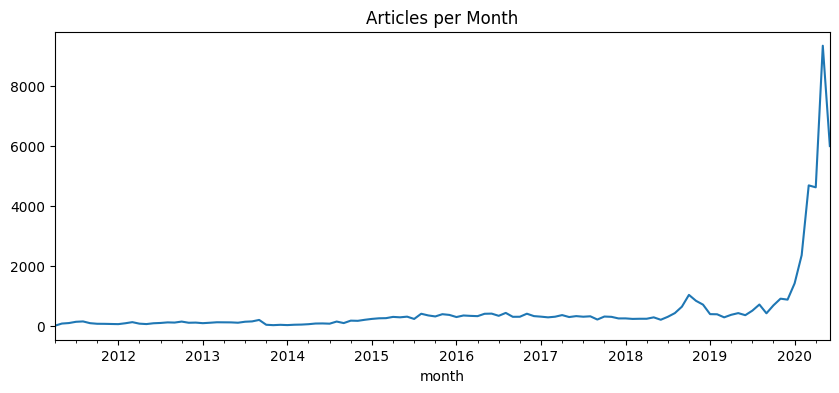

In [11]:
df['month'] = df['date'].dt.to_period('M')
df.groupby('month').size().plot(kind='line', figsize=(10,4), title="Articles per Month")


In [8]:
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

def get_tb_sent(text):
    return TextBlob(text).sentiment.polarity

def get_vader_sent(text):
    return sid.polarity_scores(text)['compound']

df['tb_polarity'] = df['headline'].apply(get_tb_sent)
df['vader_compound'] = df['headline'].apply(get_vader_sent)

df[['headline','tb_polarity','vader_compound']].head()


,headline,tb_polarity,vader_compound
0,Stocks That Hit 52-Week Highs On Friday,0.0,0.000
1,Stocks That Hit 52-Week Highs On Wednesday,0.0,0.000
2,71 Biggest Movers From Friday,0.0,0.000
3,46 Stocks Moving In Friday's Mid-Day Session,0.0,0.000
4,B of A Securities Maintains Neutral on Agilent...,0.0,0.296


In [13]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english', max_features=20)
keywords = cv.fit_transform(df['headline'])
sum_words = keywords.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
print("Top Keywords:", words_freq)


Top Keywords: [('vs', np.int64(162099)), ('stocks', np.int64(161776)), ('est', np.int64(140604)), ('eps', np.int64(128897)), ('market', np.int64(120558)), ('shares', np.int64(114313)), ('reports', np.int64(108710)), ('update', np.int64(91723)), ('earnings', np.int64(87399)), ('sales', np.int64(79645)), ('benzinga', np.int64(74516)), ('pt', np.int64(73068)), ('week', np.int64(69572)), ('announces', np.int64(66591)), ('price', np.int64(64407)), ('buy', np.int64(64371)), ('mid', np.int64(62263)), ('downgrades', np.int64(61959)), ('trading', np.int64(61182)), ('raises', np.int64(57802))]


In [15]:
df.to_csv("../data/processed/task1_processed.csv", index=False)
